In [10]:
using Printf
using Plots

In [11]:
# dane
g = 9.81
m = 2
vx₀ = 26.5
α = π / 4
vy₀=26.5
v₀=26.5
# obliczenia
czas = (2 * v₀ * sin(α)) / g
#zasieg = (v₀ ^ 2 * sin(2 * α)) / g
h=80
hₘ = h+((v₀ * sin(α)) ^ 2) / (2 * g)
czas = (2 * v₀ * sin(α)) / g

k=0.5
czas

3.8202507036582074

In [12]:
delta1=4*v₀^4*sin(α)*sin(α)*cos(α)*cos(α)+8*g*h*v₀^2*cos(α)*cos(α)
zasieg=(-2*v₀^2*sin(α)*cos(α)-sqrt(delta1))/(-2*g)
#z2=(-2*v₀^2*sin(α)*cos(α)+sqrt(delta))/(-2*g)#wychodzi ujemne więc bierzemy z1

119.5058588131964

In [13]:
delta2=v₀^2*sin(α)*sin(α)+2*g*h
t1=(-v₀*sin(α)-sqrt(delta2))/(-g)

#t2=(-v₀*sin(α)+sqrt(delta2))/(-g) ujemne wiec do wyjebania

6.3776153327044005

In [6]:
# dane
k = 0.5 #współczynnik oporu

0.5

# a) rozwiązanie analityczne

In [29]:
function x_opor(m, k, v₀, α)
    t -> m / k * v₀ * cos(α) * (1 - exp((-k / m) * t))
end

function y_opor(m, k, v₀, α, g,h)
    t ->h + (m / k * v₀ * sin(α) + (m / k)^2 * g) * (1 - exp((-k / m) * t)) - (m / k) * g * t
end

y_opor (generic function with 1 method)

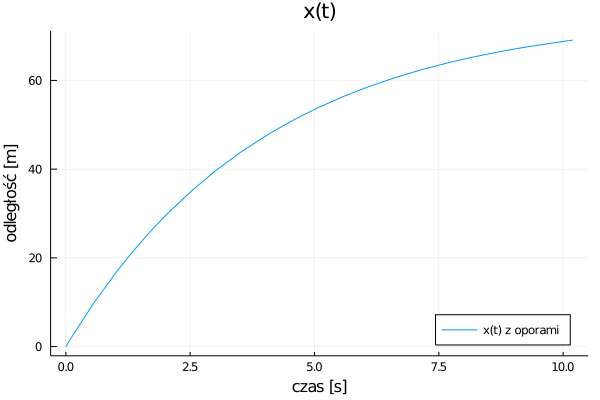

In [30]:
plot(x_opor(m, k, v₀, α), 0, czas+t1,
    xlabel = "czas [s]", 
    ylabel = "odległość [m]", 
    label = "x(t) z oporami",
    legend = :bottomright,
    title = "x(t)")

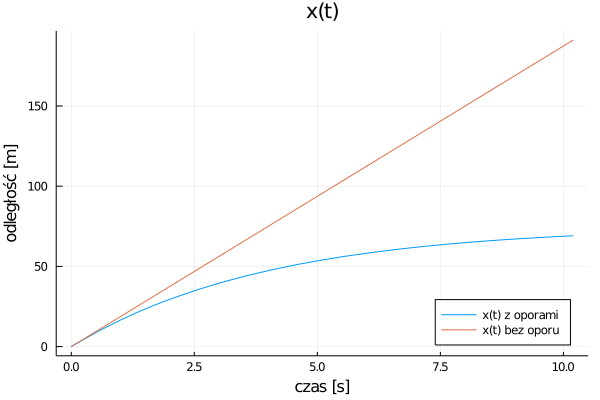

In [31]:
plot!(x(v₀, α), 0, czas+t1,
    label = "x(t) bez oporu")

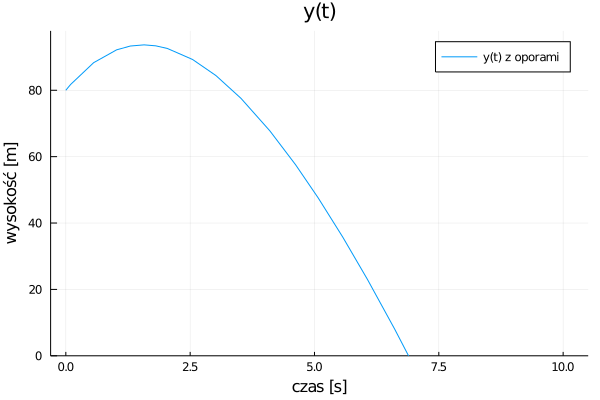

In [32]:
plot(y_opor(m, k, v₀, α, g,h), 0, czas+t1,
    xlabel = "czas [s]", 
    ylabel = "wysokość [m]", 
    label = "y(t) z oporami",
    legend = :topright,
    ylim = (0, hₘ),
    title = "y(t)")

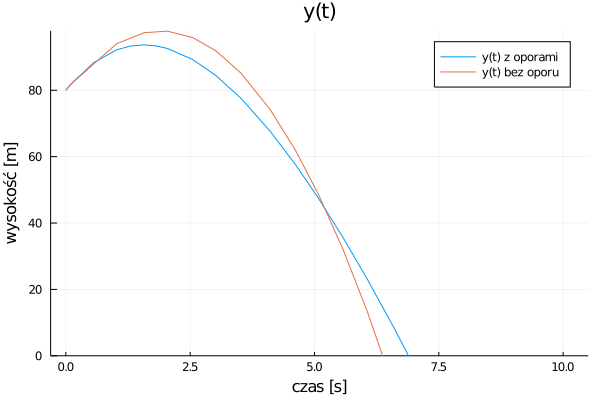

In [33]:
plot!(y(v₀, α, g,h), 0, czas+t1,
    label = "y(t) bez oporu")

# b) rozwiązanie numeryczne

Koszt obliczeń rozwiązania analitycznygeo może być zbyt duży, z uwagi na występowanie funkcji exp(). Rozwiązanie numeryczne jest bardziej wydajne. Metody numeryczne pozwalają otrzymać zadowalający wynik, minimalnie różniący się od otrzymanego metodami analitycznymi.

Wzory opisujące ruch obiketu w rzucie ukosnym z uwzględnieniem oporów powietrza:

$$ v_x(t_{j+1})=v_x(t_j)-\frac{k}{m}v_x(t_j)\Delta{t} $$

$$ v_y(t_{j+1})=v_y(t_j)-g\Delta{t}-\frac{k}{m}v_y(t_j)\Delta{t} $$

$$x(t_{j+1})=x(t_j)+v_x(t_j)\Delta{t}-\frac{1}{2}\frac{k}{m}v_x(t_j)\Delta{t^2}  $$

$$y(t_{j+1})=y(t_j)+v_y(t_j)\Delta{t}-\frac{1}{2}g\Delta{t^2}-\frac{1}{2}\frac{k}{m}v_y(t_j)\Delta{t^2}$$

In [14]:
dt = 0.001 #milisekundy, 1/1000 sekundy


0.001

In [15]:
function vx_num(v₀, α, k, m, dt)
    vx = zeros(floor(Int, czas / dt), 1)
    vx[1] = v₀ * cos(α)
    for i in (2 : floor(Int, czas / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
    end
    return vx
end

function vy_num(v₀, α, k, m, g, dt)
    vy = zeros(floor(Int, czas / dt), 1)
    vy[1] = v₀ * sin(α)
    for i in (2 : floor(Int, czas / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
    end
    return vy
end


function x_num(v₀, α, k, m, dt)
    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
    x = zeros(floor(Int, (czas+t1) / dt), 1)
    x[1] = 0
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
        x[i] = x[i-1] + vx[i-1] * dt - (1 / 2) * (k / m) * vx[i-1] * dt ^ 2
    end
    return x
end

function y_num(v₀, α, k, m, g,h, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * cos(α)
    y = zeros(floor(Int, (czas+t1) / dt), 1)
    y[1] = 80
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
        y[i] = y[i-1] + vy[i-1] * dt - ((1 / 2) * g * dt ^ 2) - (1 / 2) * (k / m) * vy[i-1] * dt ^ 2
    end
    return y
end


y_num (generic function with 1 method)

In [16]:
function v_yy(v₀, α, g)
    t -> v₀ * sin(α) - g * t / 1000
end

v_yy (generic function with 1 method)

In [17]:
h=80
czas_opor = 0
czas_opor_end=0
for i in (1 : floor(Int, (czas+t1) / dt))
    if abs(y_num(v₀, α, k, m, g, h,dt)[i]) < 0.007
        czas_opor = i
       
    end
end
czas_opor

6895

In [18]:
t1+czas

10.197866036362608

In [15]:

czas_opor_end=0
for j in (czas_opor : floor(Int, (czas+t1) / dt))
   
    if abs(y_num(v₀, α, k, m, g, h,dt)[j]) < 10.007
        czas_opor_end = czas_opor+j
    end
end
czas_opor_end

14131

In [19]:
zasieg_opor = x_num(v₀, α, k, m, dt)[czas_opor]

61.57379412696939

In [20]:
hₘ_opor = maximum(y_num(v₀, α, k, m, g,h, dt))

93.67871275992457

In [18]:
czas_wznoszenia = 0
for i in (1 : floor(Int, czas+t1 / dt))
    if abs(y_num(v₀, α, k, m, g,h, dt)[i]) == hₘ_opor
        czas_wznoszenia = i
    end
end
println("czas wznoszenia - ", czas_wznoszenia, " [ms]")
println("czas spadania - ", czas_opor - czas_wznoszenia, " [ms]")

czas wznoszenia - 1562 [ms]
czas spadania - 5333 [ms]


In [9]:
xx,yy = x_num(v₀, α, k, m, dt),y_num(v₀, α, k, m, g,h, dt)
#yy=[y(i) for i in (1 : floor(Int, (czas+t1) / dt))]
#yy[2:length(xx)].=0


function plot_with_oporr() #uzupełnic o potrzebne dane
    track_x,track_y,axis_x,axis_y,length_slope=draw_trackk(h)
    x,y = x_num(v₀, α, k, m, dt),y_num(v₀, α, k, m, g,h, dt)
    
    for i in 1:length(x)
        println(y[i],"--->",track_y[i], " argument ", x[i])
        #if y[i] <= track_y[i]
         #   y[i:length(x)] .= 0
            #@printf("%.2fm ",x[i])
        #end
    end
end

#plot_with_oporr()

plot_with_oporr (generic function with 1 method)

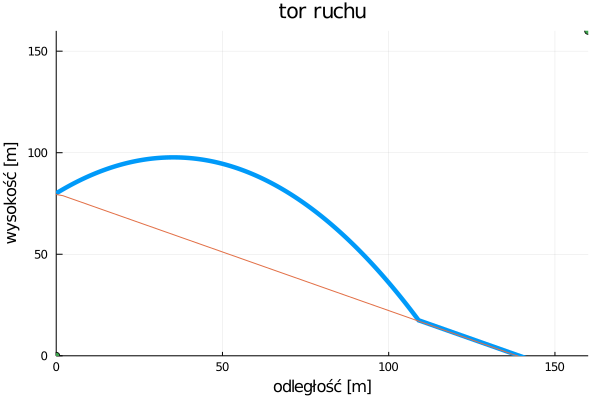

In [22]:
m=60
dt =0.001#0.1
h=80


function draw_trackk(h,angle=30) #h=80 #h=height_ramp
    angle_slope = angle/180 * π
    distance_max = h * 2
    length_slope = h / tan(angle_slope)
    y(x)=-tan(angle_slope)*x+h
    
    axis_x = [0,distance_max] 
    axis_y = [0,distance_max]
    
    #for equation
    track_x = [i for i in (1 : floor(Int, (czas+t1) / dt))] #*100
    track_x[1] = 0 #idk czy tak może być, ale brakuje w tej tablicy 1
    track_y = [y(i) for i in (1 : floor(Int, (czas+t1) / dt))] #*100

    
    return track_x,track_y,axis_x,axis_y,length_slope
end

function plot_with_opor() #uzupełnic o potrzebne dane
    track_x,track_y,axis_x,axis_y,length_slope=draw_trackk(h)
    x,y = x_num(v₀, α, k, m, dt),y_num(v₀, α, k, m, g,h, dt)
    
    #powinno sprawdzać czy styka się ze skocznią
    for i in 1:length(x)
        if x[i] >= 109 #track_y[i]  #na ten moment nie mam pomysłu jak to usprawnić, by działało przy każdych param, dlatego jest aby prosteza
        #if (x[i],y[i]) <=(track_x[i],track_y[i])
        #if y[i] == abs(track_y[i])
            for j in i:length(x)
                y[j] = track_y[j]
                x[j] = track_x[j]
            end
        end
    end
     
    #pogrubić tor ruchu
    plot(x, y, #seriestype=:scatter, #popracować aby ten scatter lepiej wyglądał
        xlabel = "odległość [m]", 
        ylabel = "wysokość [m]",
        label = "tor ruchu z oporami numerycznie",
        xlim = (0, zasieg_opor),
        ylim = (0, hₘ_opor),
        legend = :bottom,
        linewidth = 4.5,
        title = "tor ruchu")
    
    plot!(track_x,track_y)
    plot!(axis_x,axis_y, 
        seriestype=:scatter,
        xlim = (axis_x[1],axis_x[2]),
        ylim = (axis_y[1],axis_y[2]),
        leg=false)
end
    
    
plot_with_opor()
#plot!(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g,h), 0, czas_opor / 1000,
 #   label = "tor ruchu z oporami analitycznie",
  #  xlim = (0, zasieg_opor),
   # ylim = (0, hₘ_opor))

In [100]:
dt = 0.01

plot(x_num(v₀, α, k, m, dt), y_num(v₀, α, k, m, g,h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor),
    legend = :bottom,
    title = "tor ruchu")

plot!(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g, h), 0, czas+t1,
    label = "tor ruchu z oporami analitycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor))

LoadError: [91mUndefVarError: x_opor not defined[39m

In [ ]:
dt = 0.1

plot(x_num(v₀, α, k, m, dt), y_num(v₀, α, k, m, g,h, dt),
    xlabel = "odległość [m]",
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor),
    legend = :bottom,
    title = "tor ruchu")

plot!(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g,h), 0, czas+t1,
    label = "tor ruchu z oporami analitycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor))

In [ ]:
dt = 0.5

plot(x_num(v₀, α, k, m, dt), y_num(v₀, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor),
    legend = :bottom,
    title = "tor ruchu")

plot!(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g, h), 0, czas+t1,
    label = "tor ruchu z oporami analitycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor))

różnica w locie z wiatrem jest minimalna, ponieważ bierzemy pod uwagę średnią wielkość wiatru w całym locie. W rzeczywistości wiatr może zadziałać w różnych fazach lotu. Ma też znac

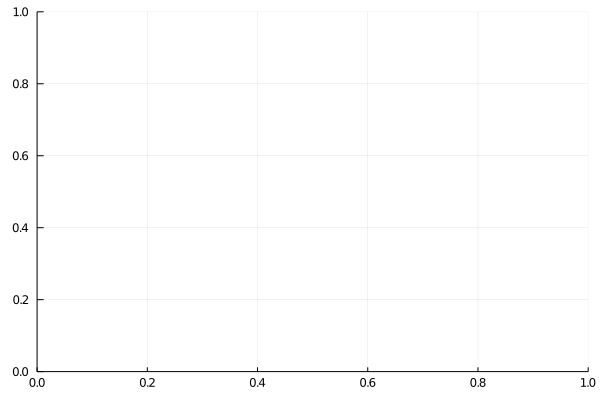

In [4]:
a=1:20
b=0
plot(a,b)